In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

from utils import load_data, accuracy

# Data Load

In [2]:
A, features, labels, idx_train, idx_val, idx_test = load_data()
A = A.to_dense()
A = A[:800,:800]

Loading cora dataset...


In [3]:
labels = labels[:800]
num_class = labels.unique().size(0)
num_class

7

In [4]:
features = features[:800,:]
num_feature = features.size(1)

In [5]:
gpu = torch.device('cuda:0')

In [6]:
features = features.to(gpu)
A = A.to(gpu)
labels = labels.to(gpu)
idx_train = idx_train.to(gpu)
idx_val = idx_val.to(gpu)
idx_test = idx_test[:300].to(gpu)

# FCN

In [7]:
from layers import FCN

In [8]:
model = FCN(num_feature , num_class).to(gpu)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.0001)

In [9]:
train_loss_arr = []
test_loss_arr = []
best_ACC, final_ACC = -999., -999.
early_stop, early_stop_max = 0., 50.

for epoch in range(100):

    optimizer.zero_grad()

    # Forward Pass
    model.train()
    output = model(features)
    train_loss = criterion(output[idx_train], labels[idx_train])

    # Backward and optimize
    train_loss.backward()
    optimizer.step()
        
    train_loss_arr.append(train_loss.data)
    
    if epoch % 1 == 0:
        model.eval()
        
        output = model(features)
        val_loss = criterion(output[idx_val], labels[idx_val])
        test_loss = criterion(output[idx_test], labels[idx_test])
        
        val_acc = accuracy(output[idx_val], labels[idx_val])
        test_acc = accuracy(output[idx_test], labels[idx_test])
        
        test_loss_arr.append(test_loss)
        
        if best_ACC < val_acc:
            best_ACC = val_acc
            early_stop = 0
            final_ACC = test_acc
            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f} *'.format(epoch, 100, train_loss.data, test_loss, test_acc))
        else:
            early_stop += 1

            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f}'.format(epoch, 100, train_loss.data, test_loss, test_acc))

    if early_stop >= early_stop_max:
        break

Epoch [0/100], Train Loss: 1.9833, Test Loss: 1.9149, Test ACC: 0.1333 *
Epoch [1/100], Train Loss: 1.8816, Test Loss: 1.8316, Test ACC: 0.3667 *
Epoch [2/100], Train Loss: 1.7630, Test Loss: 1.7685, Test ACC: 0.3600 *
Epoch [3/100], Train Loss: 1.6534, Test Loss: 1.7416, Test ACC: 0.3600
Epoch [4/100], Train Loss: 1.5632, Test Loss: 1.7110, Test ACC: 0.3600
Epoch [5/100], Train Loss: 1.4452, Test Loss: 1.6539, Test ACC: 0.3633 *
Epoch [6/100], Train Loss: 1.2910, Test Loss: 1.5909, Test ACC: 0.4033 *
Epoch [7/100], Train Loss: 1.1433, Test Loss: 1.5393, Test ACC: 0.4633 *
Epoch [8/100], Train Loss: 1.0116, Test Loss: 1.4990, Test ACC: 0.4633 *
Epoch [9/100], Train Loss: 0.8740, Test Loss: 1.4725, Test ACC: 0.4867 *
Epoch [10/100], Train Loss: 0.7408, Test Loss: 1.4562, Test ACC: 0.4800
Epoch [11/100], Train Loss: 0.6133, Test Loss: 1.4468, Test ACC: 0.4833
Epoch [12/100], Train Loss: 0.4989, Test Loss: 1.4308, Test ACC: 0.5000
Epoch [13/100], Train Loss: 0.3987, Test Loss: 1.4030, Tes

In [13]:
print("Final Accuracy::", round(float(final_ACC.data), 4))

Final Accuracy:: 0.6


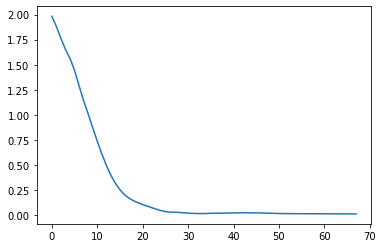

In [14]:
plt.plot(train_loss_arr)
plt.show()

# GCN

In [15]:
from layers import GCN

In [16]:
model = GCN(num_feature, num_class, A).to(gpu)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1, weight_decay=0.0001)

In [17]:
train_loss_arr = []
test_loss_arr = []
best_ACC, final_ACC = -999., -999.
early_stop, early_stop_max = 0., 50.

for epoch in range(100):

    optimizer.zero_grad()

    # Forward Pass
    model.train()
    output = model(features)
    train_loss = criterion(output[idx_train], labels[idx_train])

    # Backward and optimize
    train_loss.backward()
    optimizer.step()
        
    train_loss_arr.append(train_loss.data)
    
    if epoch % 1 == 0:
        model.eval()
        
        output = model(features)
        val_loss = criterion(output[idx_val], labels[idx_val])
        test_loss = criterion(output[idx_test], labels[idx_test])
        
        val_acc = accuracy(output[idx_val], labels[idx_val])
        test_acc = accuracy(output[idx_test], labels[idx_test])
        
        test_loss_arr.append(test_loss)
        
        if best_ACC < val_acc:
            best_ACC = val_acc
            early_stop = 0
            final_ACC = test_acc
            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f} *'.format(epoch, 100, train_loss.data, test_loss, test_acc))
        else:
            early_stop += 1

            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f}'.format(epoch, 100, train_loss.data, test_loss, test_acc))

    if early_stop >= early_stop_max:
        break
        
print("Final Accuracy::", final_ACC)

Epoch [0/100], Train Loss: 1.9451, Test Loss: 1.8909, Test ACC: 0.1333 *
Epoch [1/100], Train Loss: 1.8839, Test Loss: 1.8245, Test ACC: 0.3500 *
Epoch [2/100], Train Loss: 1.8211, Test Loss: 1.7737, Test ACC: 0.3600
Epoch [3/100], Train Loss: 1.7705, Test Loss: 1.7341, Test ACC: 0.3567
Epoch [4/100], Train Loss: 1.7322, Test Loss: 1.7011, Test ACC: 0.3567
Epoch [5/100], Train Loss: 1.6889, Test Loss: 1.6662, Test ACC: 0.3600 *
Epoch [6/100], Train Loss: 1.6266, Test Loss: 1.6310, Test ACC: 0.3867 *
Epoch [7/100], Train Loss: 1.5544, Test Loss: 1.5950, Test ACC: 0.4500 *
Epoch [8/100], Train Loss: 1.4806, Test Loss: 1.5498, Test ACC: 0.5600 *
Epoch [9/100], Train Loss: 1.4023, Test Loss: 1.4949, Test ACC: 0.6000 *
Epoch [10/100], Train Loss: 1.3101, Test Loss: 1.4301, Test ACC: 0.6167 *
Epoch [11/100], Train Loss: 1.2113, Test Loss: 1.3605, Test ACC: 0.6167 *
Epoch [12/100], Train Loss: 1.1114, Test Loss: 1.2937, Test ACC: 0.6233 *
Epoch [13/100], Train Loss: 1.0190, Test Loss: 1.2335,

In [18]:
print("Final Accuracy::", round(float(final_ACC.data), 4))

Final Accuracy:: 0.7767


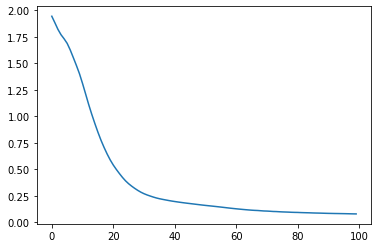

In [19]:
plt.plot(train_loss_arr)
plt.show()

# GAT

In [20]:
from layers import GAT

In [21]:
model = GAT(num_feature, num_class, A, 0.6, 5).to(gpu)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [22]:
train_loss_arr = []
test_loss_arr = []
best_ACC, final_ACC = -999., -999.
early_stop, early_stop_max = 0., 50.

for epoch in range(100):

    optimizer.zero_grad()

    # Forward Pass
    model.train()
    output = model(features)
    train_loss = criterion(output[idx_train], labels[idx_train])

    # Backward and optimize
    train_loss.backward()
    optimizer.step()
        
    train_loss_arr.append(train_loss.data)
    
    if epoch % 1 == 0:
        model.eval()
        
        output = model(features)
        val_loss = criterion(output[idx_val], labels[idx_val])
        test_loss = criterion(output[idx_test], labels[idx_test])
        
        val_acc = accuracy(output[idx_val], labels[idx_val])
        test_acc = accuracy(output[idx_test], labels[idx_test])
        
        test_loss_arr.append(test_loss)
        
        if best_ACC < val_acc:
            best_ACC = val_acc
            early_stop = 0
            final_ACC = test_acc
            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f} *'.format(epoch, 100, train_loss.data, test_loss, test_acc))
        else:
            early_stop += 1

            print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}, Test ACC: {:.4f}'.format(epoch, 100, train_loss.data, test_loss, test_acc))

    if early_stop >= early_stop_max:
        break
        
print("Final Accuracy::", final_ACC)

Epoch [0/100], Train Loss: 1.9486, Test Loss: 1.9277, Test ACC: 0.4567 *
Epoch [1/100], Train Loss: 1.9274, Test Loss: 1.9082, Test ACC: 0.5500 *
Epoch [2/100], Train Loss: 1.9021, Test Loss: 1.8883, Test ACC: 0.5700 *
Epoch [3/100], Train Loss: 1.8683, Test Loss: 1.8677, Test ACC: 0.5700
Epoch [4/100], Train Loss: 1.8408, Test Loss: 1.8464, Test ACC: 0.5833
Epoch [5/100], Train Loss: 1.8136, Test Loss: 1.8246, Test ACC: 0.5867
Epoch [6/100], Train Loss: 1.7823, Test Loss: 1.8017, Test ACC: 0.5800
Epoch [7/100], Train Loss: 1.7458, Test Loss: 1.7780, Test ACC: 0.5800
Epoch [8/100], Train Loss: 1.7265, Test Loss: 1.7535, Test ACC: 0.5833
Epoch [9/100], Train Loss: 1.7184, Test Loss: 1.7287, Test ACC: 0.5900
Epoch [10/100], Train Loss: 1.6518, Test Loss: 1.7036, Test ACC: 0.5933
Epoch [11/100], Train Loss: 1.6754, Test Loss: 1.6784, Test ACC: 0.5967
Epoch [12/100], Train Loss: 1.6016, Test Loss: 1.6526, Test ACC: 0.6033
Epoch [13/100], Train Loss: 1.5913, Test Loss: 1.6268, Test ACC: 0.6

RuntimeError: CUDA out of memory. Tried to allocate 40.00 MiB (GPU 0; 22.38 GiB total capacity; 21.68 GiB already allocated; 10.06 MiB free; 21.85 GiB reserved in total by PyTorch)

In [24]:
print("Final Accuracy::", round(float(final_ACC.data), 4))

Final Accuracy:: 0.8267


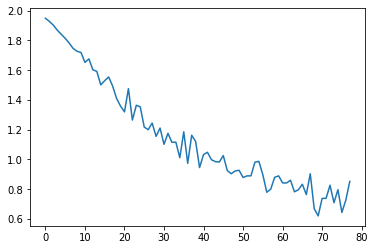

In [25]:
plt.plot(train_loss_arr)
plt.show()